The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts.

The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). 

The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.

# **Data Features**
### **Demographic:**
* Sex: male or female("M" or "F")
* Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

### **Behavioral**
* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be
considered continuous as one can have any number of cigarettes, even half a cigarette.)

### **Medical( history)**
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in
fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)
Predict variable (Desired target)
* 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import necessary basic libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read the data into dataframe
data= pd.read_csv("/content/drive/My Drive/Almabetter/capstone projects/Cardiovascular Risk Prediction/data_cardiovascular_risk.csv")

In [ ]:
# data view
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
# Renaming the columns
data.rename(columns={'cigsPerDay':'cigarettes_per_day','BPMeds':'bp_meds',
                   'prevalentStroke':'prevalent_stroke','prevalentHyp':'prevalent_hyp',
                   'totChol':'total_cholesterol','sysBP':'systolic_bp','diaBP':'diastolic_bp',
                   'heartRate':'heart_rate','TenYearCHD':'ten_year_chd'},
          inplace = True)

In [ ]:
# set column-'id' as the index.
data.set_index('id',inplace=True)
data.head(2)

,age,education,sex,is_smoking,cigarettes_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,BMI,heart_rate,glucose,ten_year_chd
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0


In [ ]:
# shape of the dataset
data.shape

(3390, 16)

Data has 3390 observations, 15 predictors and a target variable.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 3390 non-null   int64  
 1   education           3303 non-null   float64
 2   sex                 3390 non-null   object 
 3   is_smoking          3390 non-null   object 
 4   cigarettes_per_day  3368 non-null   float64
 5   bp_meds             3346 non-null   float64
 6   prevalent_stroke    3390 non-null   int64  
 7   prevalent_hyp       3390 non-null   int64  
 8   diabetes            3390 non-null   int64  
 9   total_cholesterol   3352 non-null   float64
 10  systolic_bp         3390 non-null   float64
 11  diastolic_bp        3390 non-null   float64
 12  BMI                 3376 non-null   float64
 13  heart_rate          3389 non-null   float64
 14  glucose             3086 non-null   float64
 15  ten_year_chd        3390 non-null   int64  
dtypes: flo

In [ ]:
numerical_features=['age','cigarettes_per_day','total_cholesterol','systolic_bp','diastolic_bp','BMI','heart_rate','glucose']
categorical_features=['education','sex','is_smoking','bp_meds','prevalent_stroke','prevalent_hyp','diabetes']

In [ ]:
# statistical description of the numerical features of the data
data.describe()

,age,education,cigarettes_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,BMI,heart_rate,glucose,ten_year_chd
count,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


Observation:

* 3390 observations of behavioural, demographic and medical features of individuals(male/female) in the age-group(32-70).

#**DATA CLEANING**

**Missing Value Analysis**

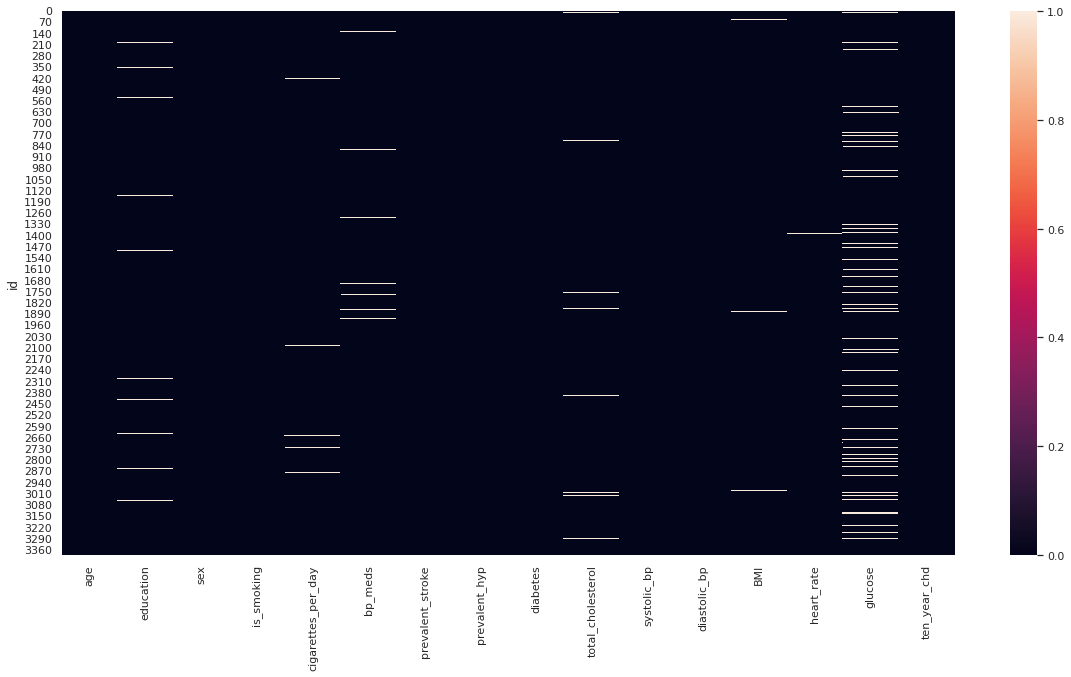

In [ ]:
# using heatmap to visualize miising values in data
missing_data= data.isnull()
plt.figure(figsize=(20,10))
sns.heatmap(missing_data)

Dataset contains null values in the following columns:
* Categorical columns:
  * education 
  * bp_meds
* Numerical columns:
  * cigarettes_per_day
  * total_cholesterol
  * BMI
  * glucose
  * heart_rate
  
Dropping the missing data isn't a better choice since the size of the dataset is small. Therefore missing data is imputed with mode/median.

Categorical missing data is imputed with respective mode values.

In [ ]:
#function to handle missing value for categorical variables with mode value
def categorical_missing(data,columns):
  '''The missing values in columns are imputed with the respective mode values'''
  for column in columns:
    data[column]=data[column].fillna(data[column].mode()[0])


In [ ]:
# function call to insert missing values for variables - education, BPMeds
categorical_missing(data,['education','bp_meds'])


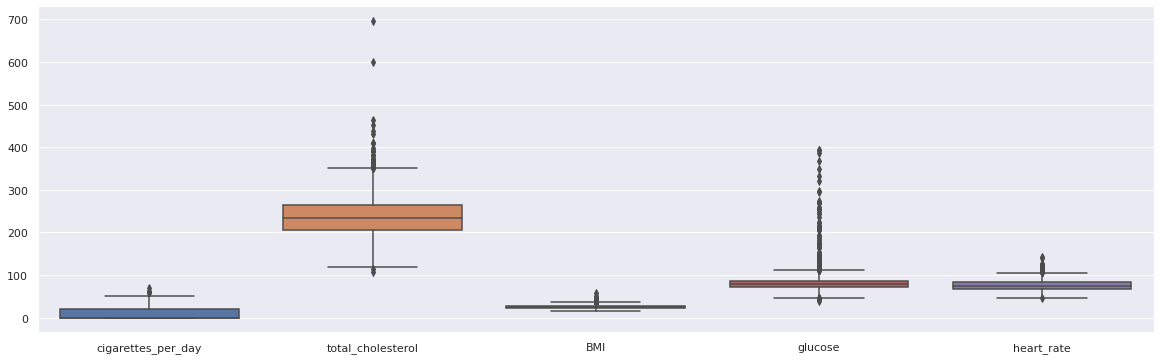

In [ ]:
# boxplot for numerical features of data with missing values
plt.figure(figsize=(20,6))
cols=['cigarettes_per_day','total_cholesterol','BMI','glucose','heart_rate']
sns.boxplot(data=data[cols])

The numerical features with missing data have outliers. Therefore as the mean value is highly influenced by the outliers, it is advised to impute missing values with the median value. 

In [ ]:
# function to handle missing data in numerical columns using median 
def numerical_missing(data, columns):
  '''The missing values in the column are imputed with median of respective column'''
  for column in columns:
    data[column]=data[column].fillna(data[column].median())

In [ ]:
# function call to impute missing values on columns- 'total_Cholesterol','BMI','heart_rate','glucose'.
numerical_missing(data,[['total_cholesterol','BMI','glucose','heart_rate']])

In [ ]:
data['cigarettes_per_day'].median()

0.0

Feature- 'cigarettes_per_day' is observed to have a median value: 0.0. 

The possible entries for feature 'is_smoking' are YES/NO. If the missing value for 'cigarettes_per_day' are imputed with median, it contradicts the entries in case where 'is_smoking' is marked as "YES".

A person marked as smoker wouldn't be using 0 cigarettes per day.  

Therefore, group the rows based on whether the person smokes, and then impute the missing values with the median of the grouped data.

In [ ]:
# imputing the missing values of the column- 'cigarettes_per_day' with the median after grouping the data
data['cigarettes_per_day']= data['cigarettes_per_day'].fillna(data[data['is_smoking']=="YES"]['cigarettes_per_day'].median())


In [ ]:
# check for any invalid observations
# invalid observation: where 'is_smoking'='YES'  and  'cigarettes_per_day'=0  or 'is_smoking'="NO" and  'cigarettes_per_day'>0
data[(data['is_smoking']=="YES") & (data['cigarettes_per_day']==0) | (data['is_smoking']=="NO") & (data['cigarettes_per_day']>0)] 


,age,education,sex,is_smoking,cigarettes_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,BMI,heart_rate,glucose,ten_year_chd
id,,,,,,,,,,,,,,,,


In [ ]:
# check for missing values
data.isna().sum()

age                   0
education             0
sex                   0
is_smoking            0
cigarettes_per_day    0
bp_meds               0
prevalent_stroke      0
prevalent_hyp         0
diabetes              0
total_cholesterol     0
systolic_bp           0
diastolic_bp          0
BMI                   0
heart_rate            0
glucose               0
ten_year_chd          0
dtype: int64

In [ ]:
data.head(2)

,age,education,sex,is_smoking,cigarettes_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,BMI,heart_rate,glucose,ten_year_chd
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0




---



**Outlier Analysis**

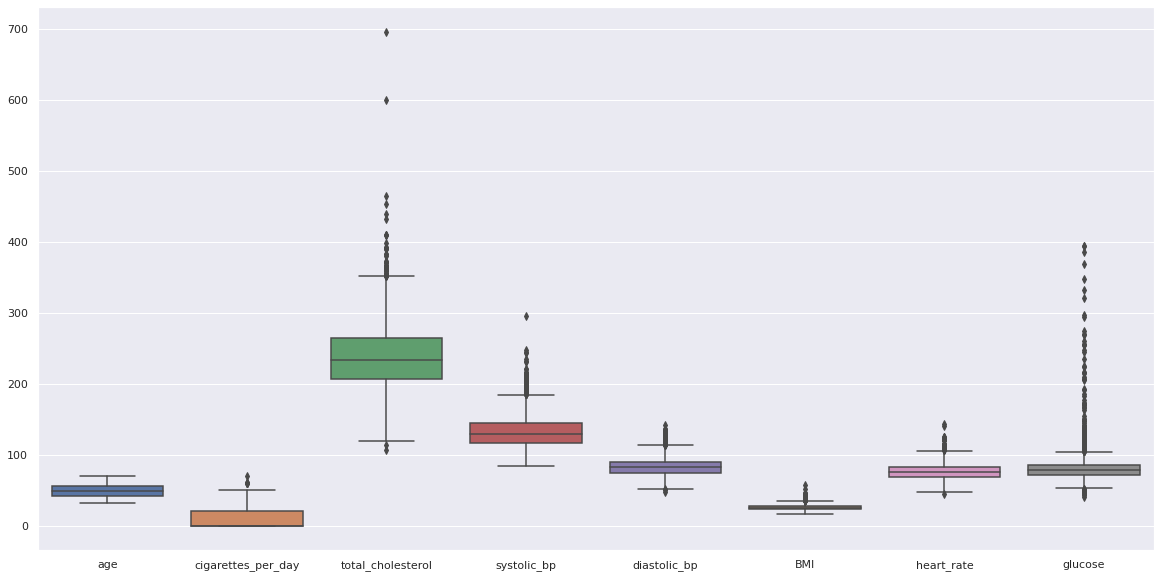

In [ ]:
# boxplot for numerical columns
plt.figure(figsize=(20,10))
sns.boxplot(data= data[numerical_features])

Since, the extreme/outlier values of features in the dataset indicate the risk of cardiovascular problems deleting/modifying the values wouldn't be a good thing to do. 

**Correlation Analysis**

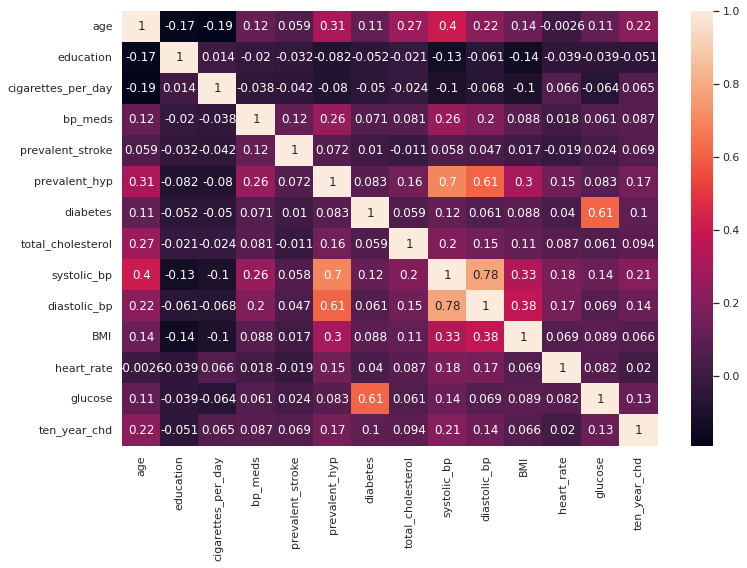

In [ ]:
# plot the correlation matrix using heatmap
plt.figure(figsize=(12,8))
correlation = data.corr()
sns.heatmap(correlation, annot=True)

Observation:

* There is a slight positive correlation between ten_year_chd(target variable) and features namely age, prevalent hypertension, diabetes, systolic_bp, diastolic_bp, glucose. 
* Independent variables are correlated among themselves.
  * High correlation of systolic bp and diastolic bp with prevalent hypertension.
  * Features 'glucose' and 'diabetes' are correlated with correlation of (0.61).
  * Systolic and diastolic blood pressure are highly correlated(0.78); New feature could be derived using the two features.

##**Exploratory Data Analysis**

Dependent Variable

0    2879
1     511
Name: ten_year_chd, dtype: int64

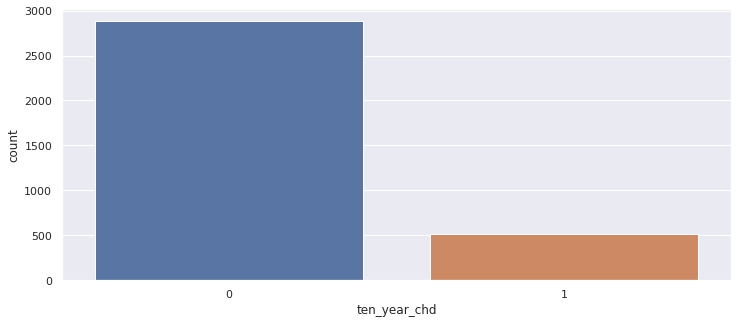

In [ ]:
# dependent variable analysis
sns.countplot(data['ten_year_chd'])
data['ten_year_chd'].value_counts()

* The dependent variable is binary(categoric), implying a classification problem.
* There is an imbalance in the dataset, that should be taken into consideration during further analysis.




---



Numerical Features: Mean, Median and Density.

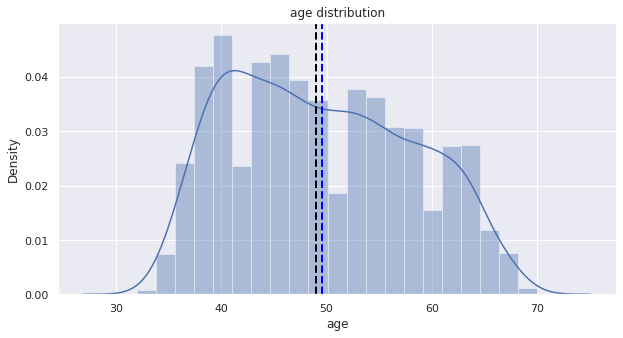

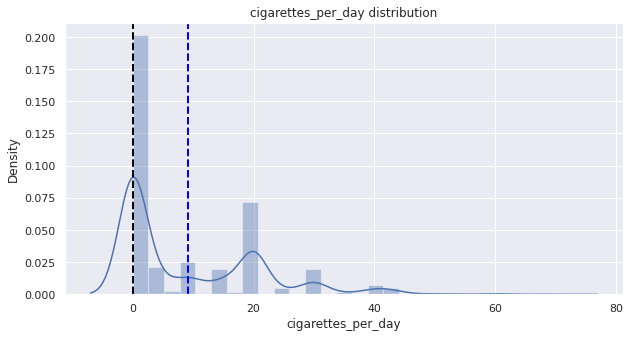

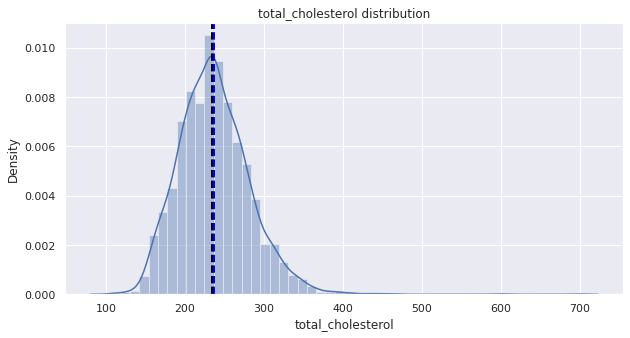

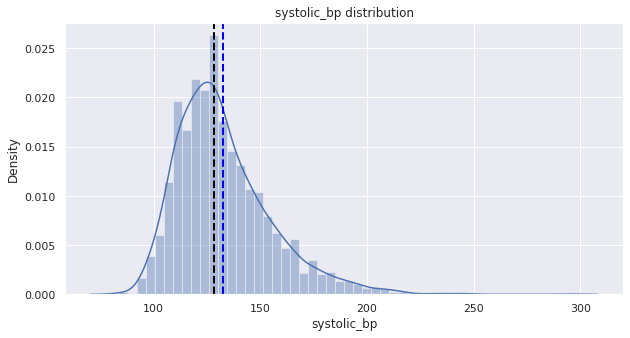

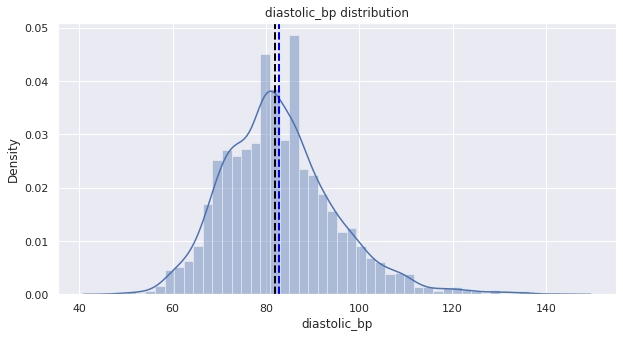

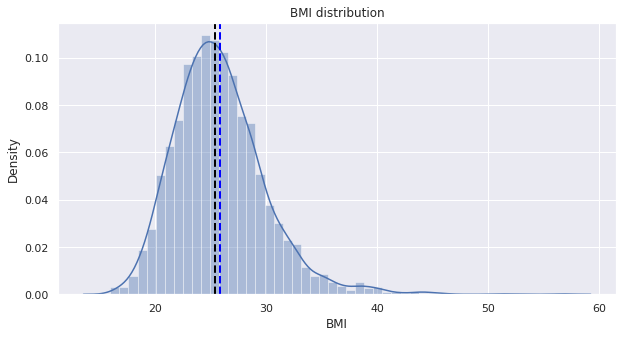

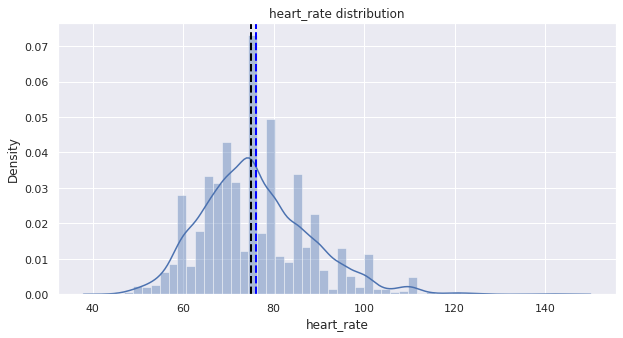

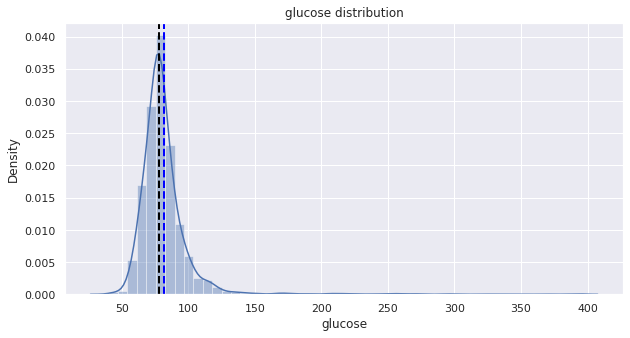

In [ ]:
# Analysing the distribution of continuous variables in the dataset, their mean(blue) and median(black).
for col in numerical_features:
  plt.figure(figsize=(10,5))
  sns.distplot(data[col])
  plt.axvline(data[col].mean(), color='blue', linestyle='dashed', linewidth=2)
  plt.axvline(data[col].median(), color='black', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()

Observation:

* Features- 'total_cholesterol', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'glucose', 'BMI' are rightly skewed. 
* Skewed distribution should be converted to normal distribution in further analysis.



---



Categorical Features: Count, Percentage of risk

In [ ]:
# independent categorical features analysis using count and barplot(indicating the percent of people at risk of developing the disease.)

def plot_percentage(data,categorical_features):
  ''' function to plot the count and percentage of patients at the risk of coronary heart disease based on different categorical features'''

  for feature in categorical_features:
    plt.rcParams["figure.figsize"] = [12,5]
    f, axes = plt.subplots(1, 2)
    sns.countplot(x=feature,hue='ten_year_chd',data=data,ax=axes[0])  

    x_var, y_var = feature, 'ten_year_chd'
    data_grouped = data.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)*100
    sns.set()
    data_grouped.plot(kind='bar', stacked=True,ax=axes[1])
    plt.legend(bbox_to_anchor=(1.05, 1),loc="upper left",title=y_var)

    plt.title("Analysis of count and percentage of patients at the risk of coronary heart disease based on feature: "+ feature)
    for ix, row in data_grouped.reset_index(drop=True).iterrows():
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(ix,cumulative + element / 2,f"{int(element)} %",va="center",ha="center")
            cumulative += element
    plt.show()


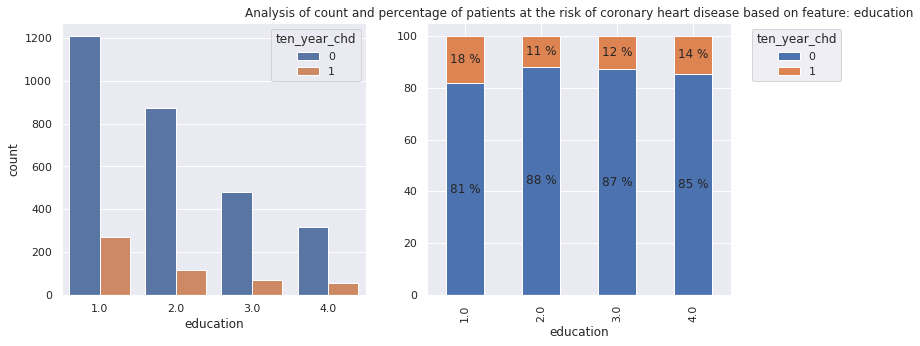

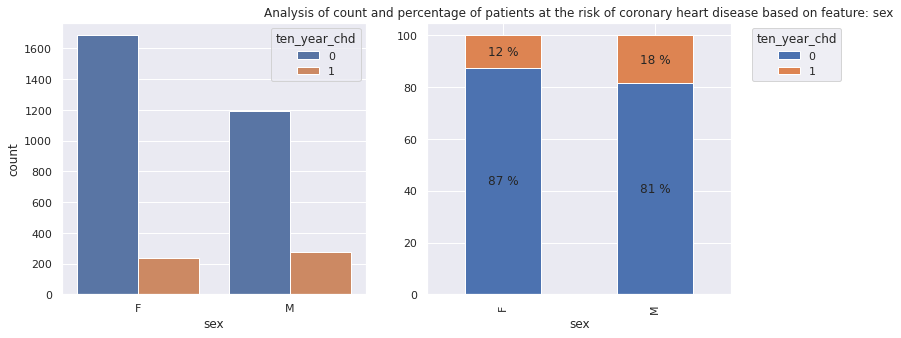

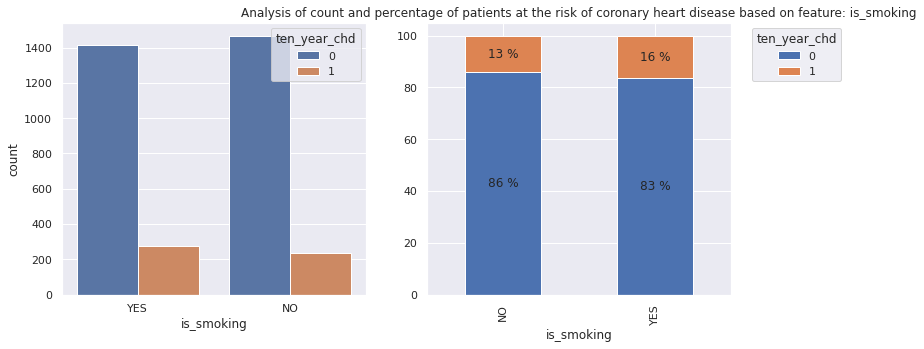

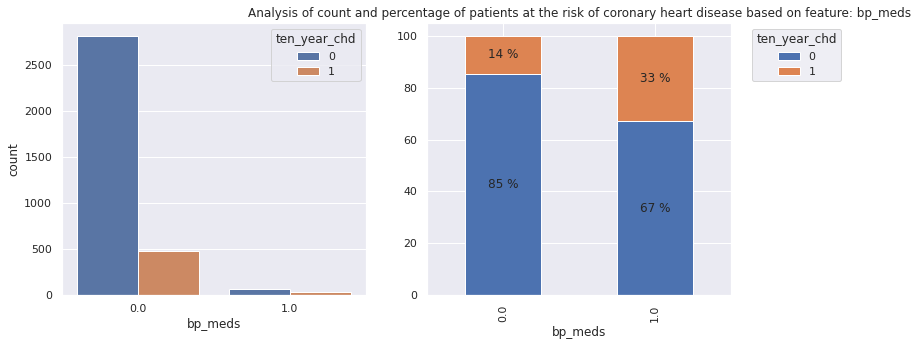

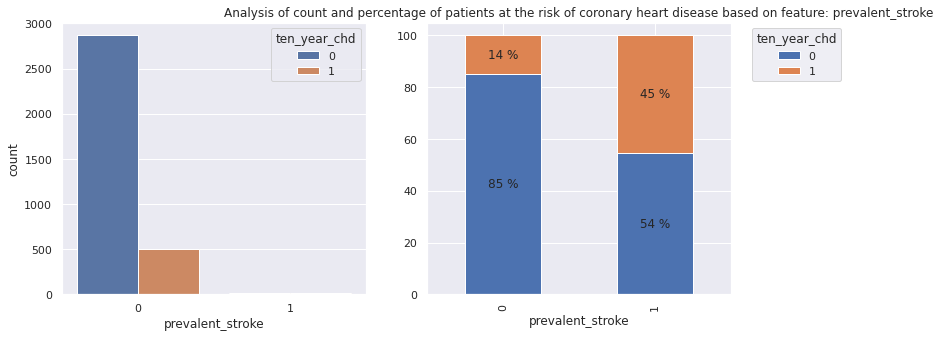

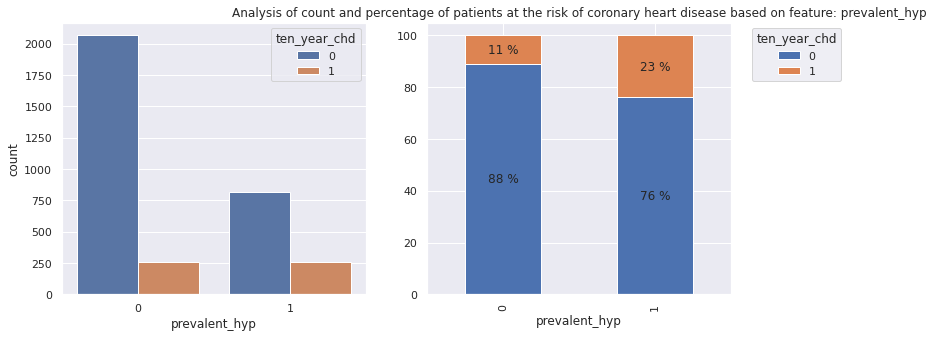

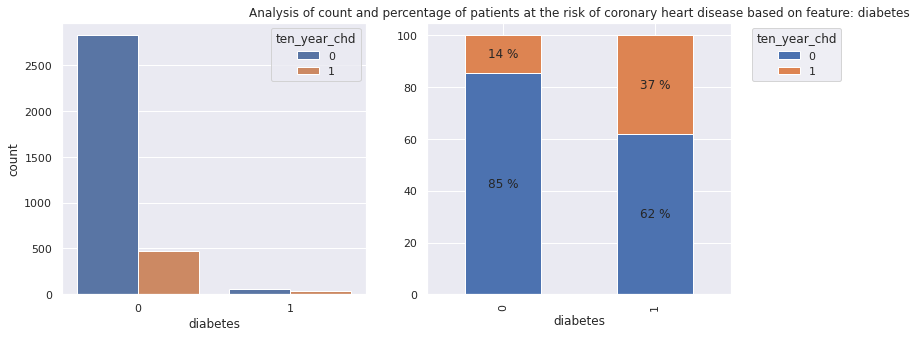

In [ ]:
plot_percentage(data,categorical_features)

Observation:

* Most of the patients possess education of level 1. The risk of coronary heart disease is maximum in patients of education level 1, followed by patients of education level 4, 3, 2.
* The count of female patients is more. Whereas, the risk of coronary heart disease is higher in male patients by 6%.
* There are almost equal number of smoking and non-smoking patients. The risk of disease is slightly higher in smokers by 3%.
* Patients who are on blood pressure medication have a significantly higher risk of coronary heart disease i.e., 33%.
* Prevalent stroke is rarely seen in patients. But the risk of coronary heart disease among them is significantly higher (45%), that is 31% higher than the others.
* Hypertension is seen in many patients (~800). Patients with prevalent hypertension are at higher risk by 12%.
* Out of the very few patients with diagnosed with diabetes, 37% of them are at risk of coronary heart disease.



---



Analysis of risk of Coronary Heart Disease according to the type of heart rate.

In [ ]:
# function to measure the heart rate of patients.
def heart_rate_measure(observation):
  ''' classifies the heart rate of patients into three different categories namely low, normal, and high'''
  
  if observation['heart_rate'] <= 59:
      value = 'Low'
  elif observation['heart_rate'] < 100:
      value = 'Normal'
  else:
      value = 'High'
  return value

In [ ]:
# assign a copy of data and apply the transformation on column- 'heart_rate' by making a call to above function.
data1=data.copy(deep=True)
data1['heart_rate'] = data1.apply(heart_rate_measure, axis = 1)

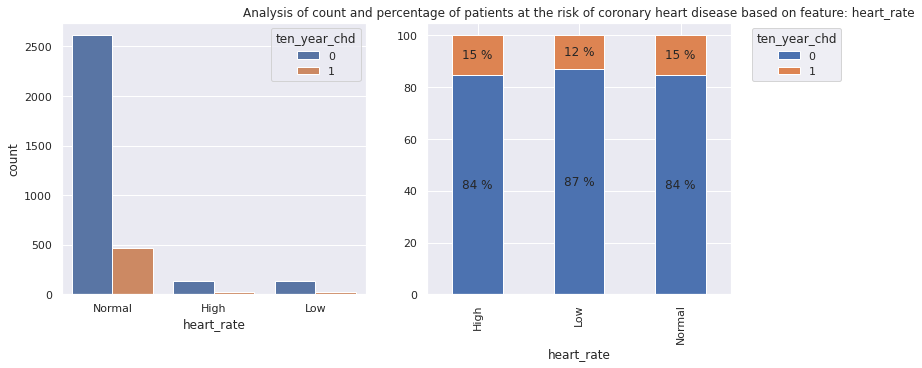

In [ ]:
# function call to plot the count and percentage of patients at risk based on the different category of heartbeat.
plot_percentage(data1,['heart_rate'])


* The risk of the coronary heart disease is higher by 3% for patients with high and normal heartbeat compared to that of low heartbeat.

* The type of heart_rate doesn't seem to affect the risk of coronary heart disease significantly.



---



Analysis of risk of Coronary Heart Disease in male and female patients of different age-group 

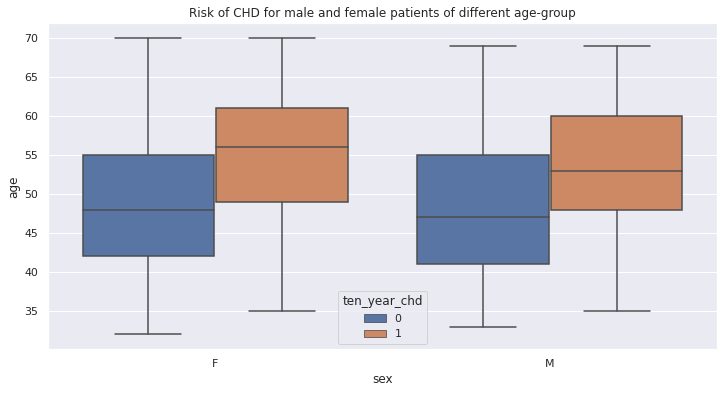

In [ ]:
plt.figure(figsize = (12,6))
ax = sns.boxplot(x = data['sex'], y = data['age'], hue =data['ten_year_chd'])
plt.title("Risk of CHD for male and female patients of different age-group")
plt.show()

* Female patients of age group (49-62) and Male patients of age group (48-60) are vulnerable to the risk of CHD.
* The average age of risk of CHD is **higher** in female patients.


##**Feature Engineering**

In [ ]:
data.head(3)

,age,education,sex,is_smoking,cigarettes_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,BMI,heart_rate,glucose,ten_year_chd
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0


**Encoding**

In [ ]:
# encoding binary values for categorical columns- 'sex' and 'is_smoking'
data['sex']=np.where(data['sex']=='M',1,0)
data['is_smoking']=np.where(data['is_smoking']=='YES',1,0)
data.head(3)

,age,education,sex,is_smoking,cigarettes_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,BMI,heart_rate,glucose,ten_year_chd
id,,,,,,,,,,,,,,,,
0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0


In [ ]:
data.head(3)

,age,education,sex,is_smoking,cigarettes_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,systolic_bp,diastolic_bp,BMI,heart_rate,glucose,ten_year_chd
id,,,,,,,,,,,,,,,,
0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0


* Features with high correlation are linearly dependent and hence have almost the same effect on the dependent variable.

* Also, the change in one of them could hamper the effect of other on the dependent variable.  

Therefore, when two features have high correlation, either one of them could be dropped or a new feature can be produced using the two. The latter is implemented in this case.

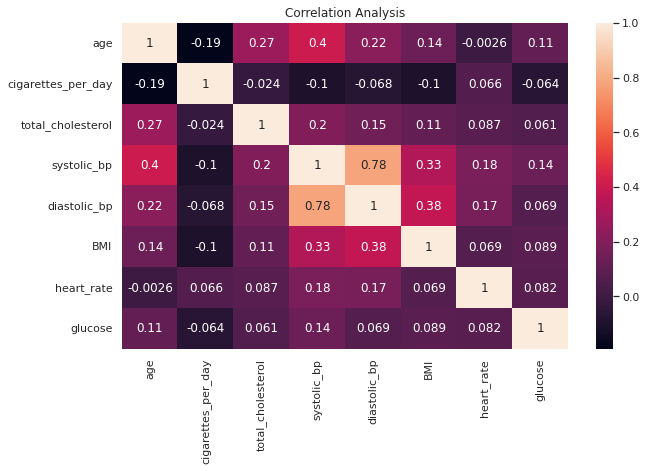

In [ ]:
# check for correlation among numerical features and try to eliminate the highly correlated independent features.
plt.figure(figsize=(10,6))
plt.title('Correlation Analysis')
correlation = data[numerical_features].corr()
sns.heatmap(correlation,annot=True)

The features- 'systolic_bp' and 'diastolic_bp' are highly correlated. Hence these two features can be replaced by their difference, called **Pulse Pressure.**

**Feature Imputation: Pulse Pressure**


Pulse pressure is the difference between the systolic and diastolic blood pressure. 
  * Pulse pressure tends to increase as one gets older, and this number can also be an indicator of health problems before the symptoms are developed.

***Pulse Pressure*** = ***Systolic Blood Pressure*** - ***Diastolic Blood Pressure***

Normal value: 40mmHg i.e., if blood pressure is 120/80 mmHg.


In [ ]:
# add the new feature and delete the features systolic and diastolic bp.
data['pulse_pressure'] = data['systolic_bp'] - data['diastolic_bp']
data.drop(['systolic_bp','diastolic_bp'], axis = 1, inplace = True)


In [ ]:
# update the list of numerical features
numerical_features= list(set(numerical_features)-set(['systolic_bp','diastolic_bp'])) + ['pulse_pressure']


**Feature Importance** 

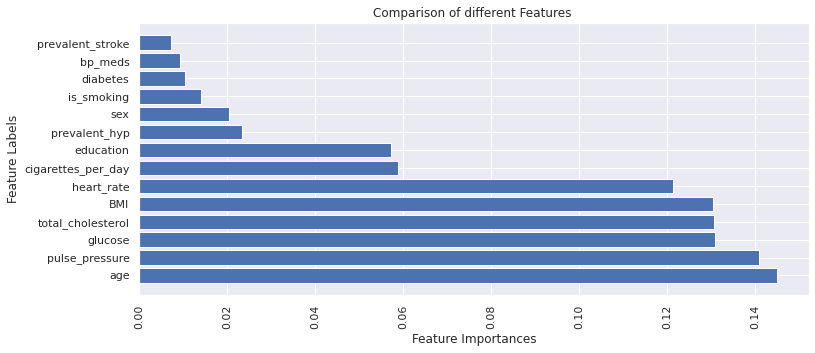

In [ ]:
#  Obtain the fature importances using the module -ExtraTreesClassifier

from sklearn.ensemble import ExtraTreesClassifier
X1, y1 = data.drop('ten_year_chd',axis=1), data['ten_year_chd']
ET=ExtraTreesClassifier()
ET.fit(X1,y1)
imp_features=pd.Series(ET.feature_importances_,index=X1.columns).sort_values(ascending=False)

pd.DataFrame(imp_features,columns=['importance'])
# Plotting a Bar Graph to compare the models
plt.barh(imp_features.index,imp_features.values)
plt.xticks(rotation='vertical')
plt.xlabel('Feature Importances')
plt.ylabel('Feature Labels')
plt.title('Comparison of different Features ')
plt.show()

It shows that 'age' is the most important feature 

**Feature Dependency on Target Variable**

To check whether the variables are related to the target variable a Null Hypothesis is defined.

**Null Hypothesis (H0)**: Features are independent of the target variable. 

**Alternate Hypothesis (H1)**: Features are dependent on the target variable. 

If a feature exhibits a 'p_value' smaller than 0.05 for 95% confidence interval, it shows the dependency on the target variable therefore, we reject the null hypothesis, and accept the alternate hypothesis. 

By this we may choose to either drop the column with high p-value, or handle it in some other way.

In feature selection, we aim to select the features which are highly dependent on the response variable.

**Scores based on statistical tests such as Chi-Square and F-Statistic, provide a p-value, that is used to rule out some features.**

* A p-value is a statistical measurement used to validate a hypothesis against observed data. It is used to define the feature selection quantitatively.
* A p-value measures the probability of obtaining the observed results, assuming that the null hypothesis is true. The lower the p-value, the greater the statistical significance of the observed difference.
 
    * A p-value less than 0.05 is typically considered to be statistically significant, in which case the null hypothesis should be rejected.
    * A p-value greater than 0.05 means that deviation from the null hypothesis is not statistically significant, and the null hypothesis is not rejected.

**Feature Selection:** Chi-Square Test

A chi-square test is used in statistics to test the independence of two events. Given the data of two variables, we can get observed count O and expected count E. Chi-Square measures how expected count E and observed count O deviates each other.

The formula for Chi-Square is given by:


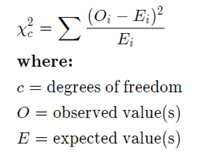

Higher the Chi-Square value and lower the p_value, the feature is more dependent on the response and it is more likely to be selected for model training.


In [ ]:
# Chi-Square test is used to test the independence in categorical features.
from sklearn.feature_selection import chi2
X = data[categorical_features]
y = data['ten_year_chd']
chi_scores = chi2(X,y)

In [ ]:
# the Chi-Square function returns a tuple of two lists. The first element is the list of Chi_scores and the second is the list of p_values.
chi_scores

(array([ 4.76184162, 13.77838959,  1.98522603, 25.10243827, 15.8619983 ,
        64.37770831, 35.50630598]),
 array([2.90973990e-02, 2.05688680e-04, 1.58840936e-01, 5.43640748e-07,
        6.81331780e-05, 1.02713702e-15, 2.54226209e-09]))

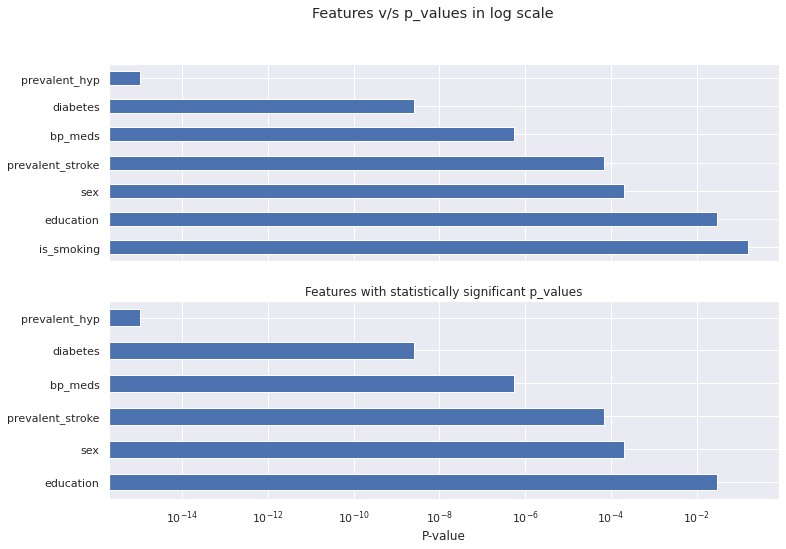

In [ ]:
 # The Features are plotted against the p_values(in log scale) after the Chi-Square Test

p_values = pd.Series(chi_scores[1],index = X.columns)# access the first element of the returned tuple.
p_values.sort_values(ascending = False , inplace = True)

fig, axs = plt.subplots(2, figsize = (12,8),sharex=True)
fig.suptitle('Features v/s p_values in log scale')
plt.xscale('log')
plt.xlabel('P-value')
plt.title('P-value for discrete features')
p_values.plot.barh(ax=axs[0])

p_values_new = p_values[p_values<0.05]
# select the p_values that are < 0.05, to obtain the statistically significant features only.

plt.xscale('log')
plt.xlabel('P-value')
plt.title('Features with statistically significant p_values')
p_values_new.plot.barh(ax=axs[1])


* After selecting statistically significant p_values, features are plotted against the p_values<0.05.
    * Therefore feature 'is_smoking' is dropped, since the p_value associated with it is greather than 0.05.
    * By rejecting the null hypothesis, features namely *prevalent_hyp, diabetes, bp_meds, prevalent_stroke, sex, education* are considered for further analysis.

In [ ]:
final_categorical_features= list(p_values_new.index)

In [ ]:
# drop the feature 'is_smoking'
# also, feature 'cigarettes_per_day' includes the information provided by 'is_smoking', feature 'is_smoking' becomes redundant.
data.drop(['is_smoking'], axis = 1, inplace = True)


**Feature Selection:** ANOVA F-Test (F-Statistic)

The ANOVA method is a type of F-statistic referred to here as an ANOVA f-test. Importantly, ANOVA is used when one variable is numeric and one is categorical, such as numerical input variables and a classification target variable(categorical) in a classification task.

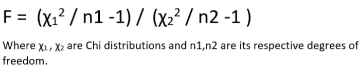

Similar to Chi-Square test, it provides a p_value, that is used to rule out features.

In [ ]:
X=data[numerical_features]
from sklearn.feature_selection import f_classif
f_classif_values= f_classif(X, y)

In [ ]:
# the F-test returns a tuple of lists. the first element is the list of f_classif values and the second element is the list of p_values.
f_classif_values

(array([ 61.45164547, 180.54002751,  29.94746835,  14.2619753 ,
          1.37849501,  14.88339492, 153.72825218]),
 array([6.02929115e-15, 3.86915119e-40, 4.76161714e-08, 1.61775892e-04,
        2.40440190e-01, 1.16493985e-04, 1.47537038e-34]))

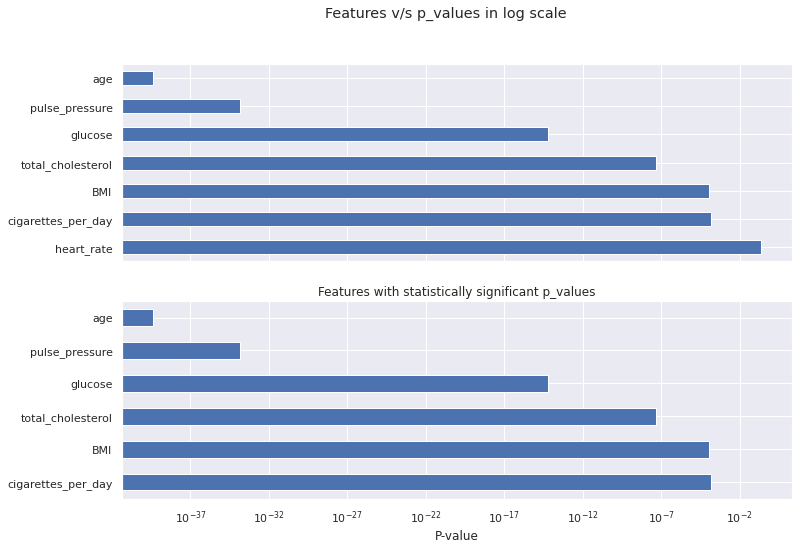

In [ ]:
 # The Features are plotted against the p_values(in log scale) after the F-Test

p_values = pd.Series(f_classif_values[1]) # access the first element of the returned tuple.
p_values.index = data[numerical_features].columns
p_values.sort_values(ascending = False, inplace = True)

fig, axs = plt.subplots(2, figsize = (12,8),sharex=True)
fig.suptitle('Features v/s p_values in log scale')
plt.xscale('log')
plt.xlabel('P-value')
plt.title('P-value for continuous features')
p_values.plot.barh(ax=axs[0])

# select the p_values that are < 0.05, to obtain the statistically significant features only.
p_values_new = p_values[p_values<0.05]

plt.xscale('log')
plt.xlabel('P-value')
plt.title('Features with statistically significant p_values')
p_values_new.plot.barh(ax=axs[1])

* After selecting statistically significant p_values, features are plotted against the p_values<0.05.
    * Therefore feature 'heart_rate' is dropped, since the p_value associated with it is greather than 0.05.
    * By rejecting the null hypothesis, features namely *cigarettes_per_day, BMI, total_cholesterol, glucose, pulse_pressure, age* are considered for further analysis.

In [ ]:
final_numerical_features= list(p_values_new.index)

In [ ]:
# drop the feature- 'heart_rate'
data.drop('heart_rate', axis = 1, inplace = True)


## **Data Preparation**

In [ ]:
data.head(3)

,age,education,sex,cigarettes_per_day,bp_meds,prevalent_stroke,prevalent_hyp,diabetes,total_cholesterol,BMI,glucose,ten_year_chd,pulse_pressure
id,,,,,,,,,,,,,
0,64,2.0,0,3.0,0.0,0,0,0,221.0,25.38,80.0,1,63.0
1,36,4.0,1,0.0,0.0,0,1,0,212.0,29.77,75.0,0,70.0
2,46,1.0,0,10.0,0.0,0,0,0,250.0,20.35,94.0,0,45.0


**Skew Transformation**

As a rule of thumb,
* If **skewness < -1** or **skewness > 1**: distribution is highly skewed. 
* If  **-1 < skewness < -0.5**  or  **0.5 < skewness < 1**: distribution is moderately skewed. 
* If **-0.5 < skewness < 0.5**: distribution is approximately symmetric.

In [ ]:
# Checking skew of continuous features
data[final_numerical_features].skew(axis = 0)

cigarettes_per_day    1.204077
BMI                   1.025551
total_cholesterol     0.948170
glucose               6.462108
pulse_pressure        1.412382
age                   0.225796
dtype: float64

The skew values of the featues indicate high skewness.

In [ ]:
# Skew after sqrt transformation
np.sqrt(data[final_numerical_features]).skew(axis = 0)

cigarettes_per_day    0.459793
BMI                   0.663534
total_cholesterol     0.410514
glucose               4.109036
pulse_pressure        0.840977
age                   0.103528
dtype: float64

The skewness in features is either moderate or high even after square-root transformation.

In [ ]:
# Skew after log10 transformation
np.log10(data[final_numerical_features]+1).skew(axis = 0)

cigarettes_per_day    0.275072
BMI                   0.370422
total_cholesterol     0.011860
glucose               2.411348
pulse_pressure        0.354174
age                  -0.015053
dtype: float64

The skewness in features is approximately symmetric except for the feature- 'glucose' after log transformation.

In [ ]:
# Skew for reciprocal transformation
np.reciprocal(data[final_numerical_features]).skew(axis = 0)

cigarettes_per_day         NaN
BMI                   0.198110
total_cholesterol     0.681465
glucose              -0.349527
pulse_pressure        0.736008
age                   0.000000
dtype: float64

Therefore, considering reciprocal transformation for feature- 'glucose' and log transformation for the rest of the features.

In [ ]:
# Transforming continuous variables

data['age']                   = np.log10(data['age']+1)
data['cigarettes_per_day']    = np.log10(data['cigarettes_per_day']+1)
data['total_cholesterol']     = np.log10(data['total_cholesterol']+1)
data['BMI']                   = np.log10(data['BMI']+1)
# df['heart_rate']            = np.log10(df['heart_rate']+1)
data['glucose']               = np.reciprocal(data['glucose'])
data['pulse_pressure']        = np.log10(data['pulse_pressure']+1)

In [ ]:
# Checking skew after transformation
data[final_numerical_features].skew(axis = 0)

cigarettes_per_day    0.275072
BMI                   0.370422
total_cholesterol     0.011860
glucose              -0.349527
pulse_pressure        0.354174
age                  -0.015053
dtype: float64

The skew values indicate approximately symmetric distribution after transformation.

In [ ]:
dependent_variable=['ten_year_chd']
# obtain the independent features from finalized features.
independent_variables= final_numerical_features + final_categorical_features 
independent_variables

['cigarettes_per_day',
 'BMI',
 'total_cholesterol',
 'glucose',
 'pulse_pressure',
 'age',
 'education',
 'sex',
 'prevalent_stroke',
 'bp_meds',
 'diabetes',
 'prevalent_hyp']

**Data Splitting**

In [ ]:
X=data[independent_variables]
y=data[dependent_variable]

In [ ]:
# train test split with test data size of 30%
from sklearn.model_selection import train_test_split
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X, y, test_size=0.30, random_state=42, shuffle=True)


In [ ]:
X_train_data.head(3)

,cigarettes_per_day,BMI,total_cholesterol,glucose,pulse_pressure,age,education,sex,prevalent_stroke,bp_meds,diabetes,prevalent_hyp
id,,,,,,,,,,,,
1071,0.000000,1.480438,2.399674,0.014085,1.498311,1.602060,2.0,0,0,0.0,0,0
3250,1.322219,1.401745,2.469822,0.016949,2.012837,1.785330,2.0,0,0,1.0,0,1
2893,1.322219,1.400365,2.450249,0.015152,1.763428,1.748188,1.0,1,0,0.0,0,1


In [ ]:
y_train_data.head(3)

,ten_year_chd
id,
1071,0
3250,0
2893,0


**Handling Data Imbalance: Oversampling- SMOTE**

In [ ]:
y_train_data.value_counts()

ten_year_chd
0               2011
1                362
dtype: int64

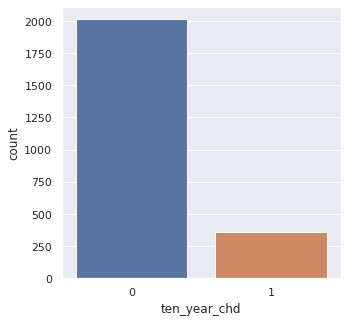

In [ ]:
# visualize the dependent variable used in training
plt.figure(figsize=(5,5))
sns.countplot(y_train_data['ten_year_chd'])

Due to large difference in number of observations of both the types of dependent variable, it becomes **Imbalanced Classification**.
Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance.

* One approach to addressing imbalanced datasets is to oversample the minority class. 
* The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples.
* This is a type of data augmentation for the minority class and is referred to as the **Synthetic Minority Oversampling Technique**, or **SMOTE** for short.

**SMOTE: Synthetic Minority Oversampling Technique**

* SMOTE first selects a minority class instance 'a' at random and finds its k nearest minority class neighbors. 
* The synthetic instance is then created by choosing one of the k nearest neighbors 'b' at random and connecting 'a' and 'b' to form a line segment in the feature space. 
* The synthetic instances are generated as a convex combination of the two chosen instances 'a' and 'b'.

**Note:** Typically undersampling/oversampling techniques will be done on **train split** only, this is the correct approach. Iorder to avoid using 
synthetic data for testing purposes.





In [ ]:
#import SMOTE 
from imblearn.over_sampling import SMOTE
smote = SMOTE()

# fit resampler on train data. Test data is not oversampled, beacuse the goal is to train a model that predicts well real data, not synthetic ones.
X_train_oversample, y_train_oversample = smote.fit_resample(X_train_data, y_train_data)


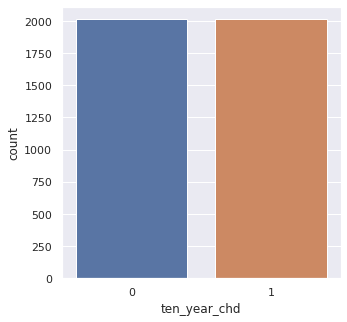

In [ ]:
# visualize the dependent variable(after oversampling) used in training
plt.figure(figsize=(5,5))
sns.countplot(y_train_oversample['ten_year_chd'])

In [ ]:
X_train_oversample.head(3)

,cigarettes_per_day,BMI,total_cholesterol,glucose,pulse_pressure,age,education,sex,prevalent_stroke,bp_meds,diabetes,prevalent_hyp
0,0.000000,1.480438,2.399674,0.014085,1.498311,1.602060,2.0,0,0,0.0,0,0
1,1.322219,1.401745,2.469822,0.016949,2.012837,1.785330,2.0,0,0,1.0,0,1
2,1.322219,1.400365,2.450249,0.015152,1.763428,1.748188,1.0,1,0,0.0,0,1


In [ ]:
y_train_oversample.head(3)

,ten_year_chd
0,0
1,0
2,0


In [ ]:
print("Original training data shape:",X_train_data.shape,y_train_data.shape )
print("Shape of training data after SMOTE:", X_train_oversample.shape,y_train_oversample.shape)


Original training data shape: (2373, 12) (2373, 1)
Shape of training data after SMOTE: (4022, 12) (4022, 1)


**Feature Scaling** 

The objective of feature scaling is to enclose all features in a common boundary without losing information. 

* The three things that define the features are the units, magnitude, and range. 
* Most of the times, dataset contains features highly varying in magnitudes, units and range. But since, most of the machine learning algorithms use distance between two data points in their computations, this is a problem. 
* To supress this effect, we need to bring all features to the same level of magnitudes. This can be acheived by scaling.

* Tree based models are not distance based models and can handle varying ranges of features. Hence, Scaling is not required while modelling trees.
* Algorithms like Linear Discriminant Analysis(LDA), Naive Bayes are by design equipped to handle this and gives weights to the features accordingly. Performing a features scaling in these algorithms may not have much effect.



In the given classification problem, Standard Scaler is used, that is defined as:

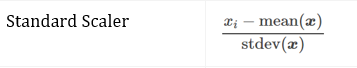

In [ ]:
from sklearn.preprocessing import StandardScaler
# initialize the scaler 
scaler = StandardScaler()

# the scaler is fit using the training set only and then applying the transform to both the training and testing set.
X_train_oversample_scaled = scaler.fit_transform(X_train_oversample)
X_test_scaled = scaler.transform(X_test_data)

# convert to dataframe
X_train = pd.DataFrame(X_train_oversample_scaled)
X_test = pd.DataFrame(X_test_scaled)

In [ ]:
y_train = y_train_oversample
y_test = y_test_data

In [ ]:
X_train.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.943827,0.872625,0.326920,0.683285,-1.792937,-1.586994,0.104521,-0.974953,-0.074162,-0.201149,-0.170795,-0.801857
1,1.092587,-0.421094,1.253967,2.020075,2.523071,0.986059,0.104521,-0.974953,-0.074162,5.273652,-0.170795,1.247106
2,1.092587,-0.443778,0.995300,1.181206,0.430950,0.464599,-0.868417,1.025690,-0.074162,-0.201149,-0.170795,1.247106


In [ ]:
y_train.head(3)

,ten_year_chd
0,0
1,0
2,0


In [ ]:
pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score, precision_recall_curve, auc
from sklearn.metrics import RocCurveDisplay


Defining required function definitions.

In [ ]:
# Function to get Confusion matrix

def get_confusion_matrix(test_preds):
  '''obtains the confusion matrix given the test predicted results'''

  cm=confusion_matrix(y_test,test_preds)
  conf_matrix= pd.DataFrame(data=cm, columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
  plt.figure(figsize = (5,4))
  sns.heatmap(conf_matrix, annot=True,fmt='d')
  plt.title('Confusion Matrix', weight= 'bold')

In [ ]:
# Function to get train and test recall and f1 score!

def evaluation_results(train_pred, test_pred):
  '''obtains the evaluation metric scores- recall and f1_score'''

  print("\nThe recall on train data: ", recall_score(y_train,train_pred))
  print("The recall on test data: ", recall_score(y_test,test_pred))

  print("\nThe f1 score on train data: ", f1_score(y_train,train_pred))
  print("The f1 score on test data: ", f1_score(y_test,test_pred))
  print("\n")

In [ ]:
# Function to get the visualization results
def get_roc_curve(clf):
  ''' obtains the visualization of results (Precision- Recall AUC curve)'''

  # y_score = clf.decision_function(X_test)
  y_pred = clf.predict_proba(X_test)[:, 1]

  # display = PrecisionRecallDisplay.from_predictions(y_test, y_pred)
  display = RocCurveDisplay.from_predictions(y_test, y_pred)
  _ = display.ax_.set_title("2-class ROC curve")


In [ ]:
def hyperparameter_tuning(function,estimator,params):
  ''' given the hyperparameter tuning function, the model(estimator), and the parameters for tuning, the respective tuning is applied.'''

  if function=='GridSearchCV':
    model=GridSearchCV(estimator=estimator,
                       param_grid = params,
                       cv = StratifiedKFold(), verbose=0, scoring='recall')
  elif function=='RandomizedSearchCV':
    model=RandomizedSearchCV(estimator=estimator,
                       param_distributions = params,
                       cv = 5, verbose=0)
    
  elif function=='BayesSearchCV':
    model= BayesSearchCV(estimator=estimator,
                       search_spaces =params,
                       cv = 5, verbose=0, scoring='recall', n_iter=32)
  model.fit(X_train,y_train)
  print("\nBest parameters",model.best_params_)

  return model

In [ ]:
# Function including the function calls for the results and visualizations.
def results(model):
  y_test_pred=model.predict(X_test)
  y_train_pred=model.predict(X_train)
  evaluation_results(y_train_pred,y_test_pred )
  get_roc_curve(model)
  get_confusion_matrix(y_test_pred)
  print(classification_report(y_test,y_test_pred))

##Data Modeling

#**Logistic Regression**

In [ ]:
# fit the logistic regressor model
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(fit_intercept=True, random_state= 42)
lr_model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [ ]:
# obtain the train and test predictions and evaluate results
train_pred_lr= lr_model.predict(X_train) 
test_pred_lr= lr_model.predict(X_test)

evaluation_results(train_pred_lr, test_pred_lr)


The recall on train data:  0.6996519144704128
The recall on test data:  0.6845637583892618

The f1 score on train data:  0.6841721371261853
The f1 score on test data:  0.3834586466165414




In [ ]:
# define and describe the parameters to be tuned.

params_lr = {'penalty':['l1','l2'],
             'C' : [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100,1e+3,1e+4,1e+5,1e+6],
             'max_iter': [10,100,200],
              'class_weight':['balanced',None]} 

#   # penalty: specifies the norm of the penalty, L2 is used by default.
#   # C: inverse of regularization strength.
#   # max_iter: Maximum number of iterations taken for the solvers to converge
#   # The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).


Hyperparameter tuning


In [ ]:
lr_grid= hyperparameter_tuning('GridSearchCV',lr_model,params_lr)



Best parameters {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 10, 'penalty': 'l2'}



The recall on train data:  0.7016409746394828
The recall on test data:  0.6845637583892618

The f1 score on train data:  0.6859504132231405
The f1 score on test data:  0.3813084112149533


              precision    recall  f1-score   support

           0       0.93      0.67      0.78       868
           1       0.26      0.68      0.38       149

    accuracy                           0.67      1017
   macro avg       0.59      0.68      0.58      1017
weighted avg       0.83      0.67      0.72      1017



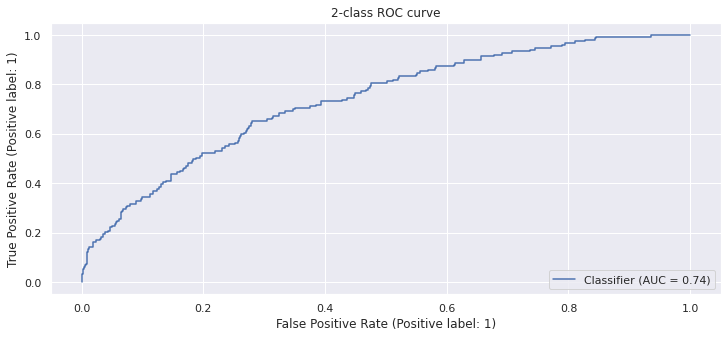

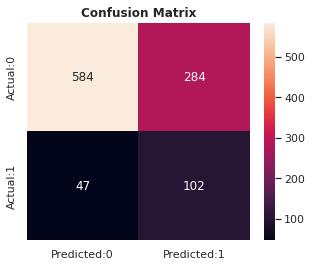

In [ ]:
results(lr_grid)

In [ ]:
lr_random=hyperparameter_tuning('RandomizedSearchCV',lr_model,params_lr)


Best parameters {'penalty': 'l2', 'max_iter': 200, 'class_weight': None, 'C': 0.001}



The recall on train data:  0.6976628543013426
The recall on test data:  0.6644295302013423

The f1 score on train data:  0.6837231968810915
The f1 score on test data:  0.3694029850746269


              precision    recall  f1-score   support

           0       0.92      0.67      0.77       868
           1       0.26      0.66      0.37       149

    accuracy                           0.67      1017
   macro avg       0.59      0.67      0.57      1017
weighted avg       0.82      0.67      0.72      1017



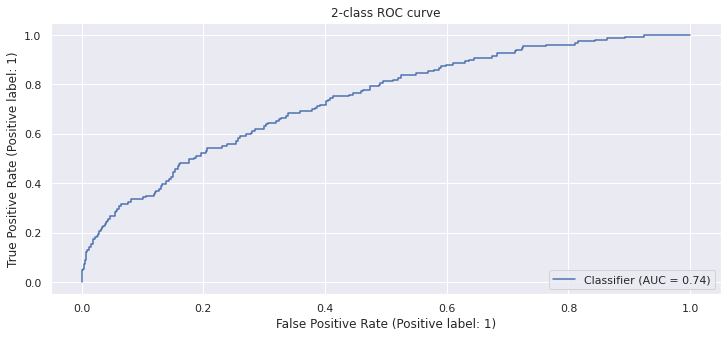

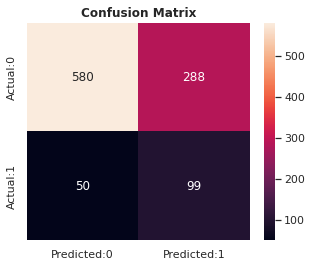

In [ ]:
results(lr_random)

In [ ]:
params_lr_bayes= {'C' : Real(1e-6, 1e+6, prior='log-uniform') }
lr_bayes=hyperparameter_tuning('BayesSearchCV',lr_model,params_lr_bayes)


Best parameters OrderedDict([('C', 0.002908685734923002)])



The recall on train data:  0.7041272998508205
The recall on test data:  0.6644295302013423

The f1 score on train data:  0.6870451237263464
The f1 score on test data:  0.37786259541984735


              precision    recall  f1-score   support

           0       0.92      0.68      0.78       868
           1       0.26      0.66      0.38       149

    accuracy                           0.68      1017
   macro avg       0.59      0.67      0.58      1017
weighted avg       0.83      0.68      0.72      1017



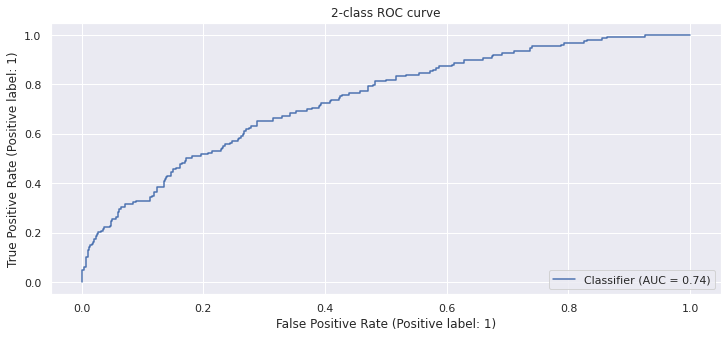

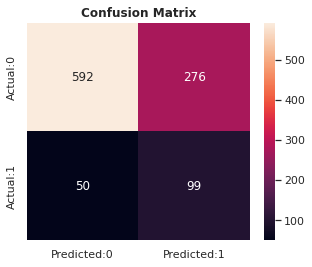

In [ ]:
results(lr_bayes)



---



---



#**Decision Tree**

In [ ]:
# fit the decision tree model

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state= 42,class_weight='balanced')
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [ ]:
# obtain the train and test predictions and evaluate results

train_pred_dt= dt_model.predict(X_train) 
test_pred_dt= dt_model.predict(X_test)

evaluation_results(train_pred_dt, test_pred_dt)


The recall on train data:  1.0
The recall on test data:  0.3959731543624161

The f1 score on train data:  1.0
The f1 score on test data:  0.29064039408866993




In [ ]:
# define and describe the parameters to be tuned.
params_dt = {'criterion': ['gini', 'entropy'],
             'max_depth':np.arange(1,20,1) ,
             'min_samples_leaf': np.arange(0.1,0.6,0.1), 
            'min_samples_split': np.arange(0.1,1,0.1)}

# criterion: the function to measure the quality of a split.
# # max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
# # min_samples_leaf/min_samples_split:The minimum number of samples required to be at a leaf node/ to split an internal node



Hyperparameter Tuning

In [ ]:
dt_grid=hyperparameter_tuning('GridSearchCV',dt_model,params_dt)


Best parameters {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1}



The recall on train data:  0.8468423669816012
The recall on test data:  0.8322147651006712

The f1 score on train data:  0.7106196536615899
The f1 score on test data:  0.3319946452476573


              precision    recall  f1-score   support

           0       0.94      0.45      0.61       868
           1       0.21      0.83      0.33       149

    accuracy                           0.51      1017
   macro avg       0.57      0.64      0.47      1017
weighted avg       0.83      0.51      0.57      1017



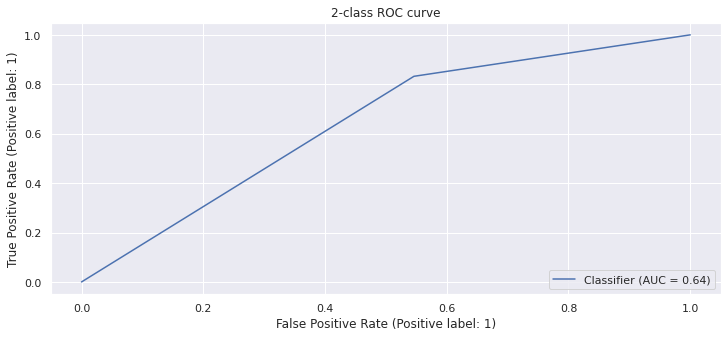

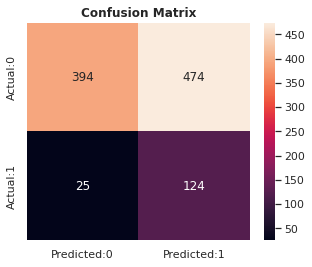

In [ ]:
results(dt_grid)

In [ ]:
dt_random=hyperparameter_tuning('RandomizedSearchCV',dt_model,params_dt)


Best parameters {'min_samples_split': 0.5, 'min_samples_leaf': 0.4, 'max_depth': 1, 'criterion': 'gini'}



The recall on train data:  0.7558428642466435
The recall on test data:  0.6912751677852349

The f1 score on train data:  0.6912232833105957
The f1 score on test data:  0.31937984496124033


              precision    recall  f1-score   support

           0       0.91      0.55      0.68       868
           1       0.21      0.69      0.32       149

    accuracy                           0.57      1017
   macro avg       0.56      0.62      0.50      1017
weighted avg       0.81      0.57      0.63      1017



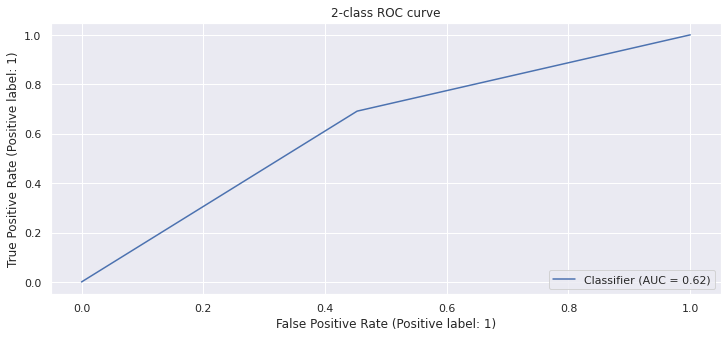

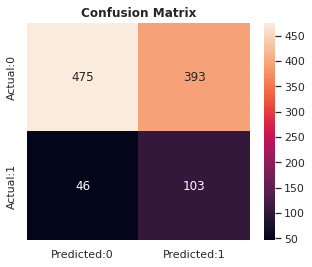

In [ ]:
results(dt_random)

In [ ]:
params_dt_bayes = {'criterion': ['gini', 'entropy'],'max_depth':Integer(1,20) ,'min_samples_leaf': Real(0.1,0.5), 
         'min_samples_split': Real(0.1,1),'class_weight':['balanced']}
dt_bayes=hyperparameter_tuning('BayesSearchCV',dt_model,params_dt_bayes)


Best parameters OrderedDict([('class_weight', 'balanced'), ('criterion', 'entropy'), ('max_depth', 4), ('min_samples_leaf', 0.12656751196793575), ('min_samples_split', 0.8339151746114866)])



The recall on train data:  0.8468423669816012
The recall on test data:  0.8322147651006712

The f1 score on train data:  0.7106196536615899
The f1 score on test data:  0.3319946452476573


              precision    recall  f1-score   support

           0       0.94      0.45      0.61       868
           1       0.21      0.83      0.33       149

    accuracy                           0.51      1017
   macro avg       0.57      0.64      0.47      1017
weighted avg       0.83      0.51      0.57      1017



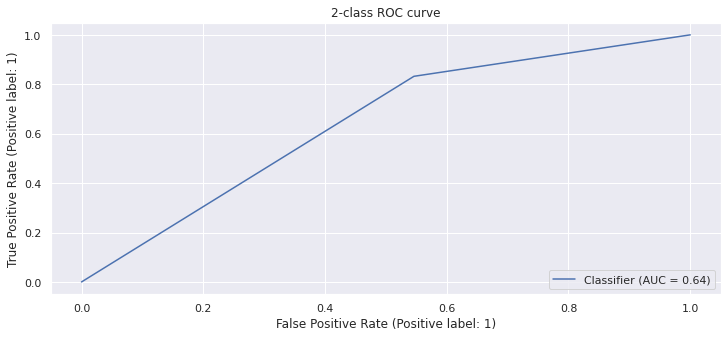

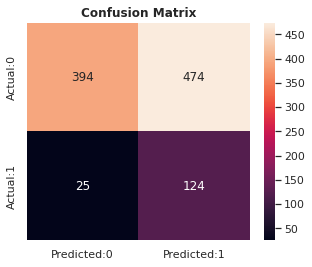

In [ ]:
results(dt_bayes)

#**Random Forest**

In [ ]:
# fit the random forest model

from sklearn.ensemble import RandomForestClassifier 

rf_model=RandomForestClassifier(random_state= 42,class_weight='balanced')
rf_model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# obtain the train and test predictions and evaluate the results.

train_pred_rf= rf_model.predict(X_train)
test_pred_rf= rf_model.predict(X_test)

evaluation_results(train_pred_rf, test_pred_rf)


The recall on train data:  1.0
The recall on test data:  0.3087248322147651

The f1 score on train data:  1.0
The f1 score on test data:  0.292063492063492




In [ ]:
# define and describe the parameters

params_rf = { 'max_depth': np.arange(1,10,2), 'min_samples_leaf':np.arange(0.1,0.6,0.1), 'min_samples_split': np.arange(0.1,1,0.1), 'criterion': ['gini', 'entropy'],
    'n_estimators': [500] }

# #  max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
# #  min_samples_split/min_samples_leaf: The minimum number of samples required to split an internal node/to be at a leaf node
# #  n_estimators: The number of trees in the forest.

Hyperparameter Tuning

In [ ]:
rf_grid=hyperparameter_tuning('GridSearchCV',rf_model,params_rf)


Best parameters {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'n_estimators': 500}



The recall on train data:  0.747886623570363
The recall on test data:  0.6845637583892618

The f1 score on train data:  0.6985601486298189
The f1 score on test data:  0.3451776649746193


              precision    recall  f1-score   support

           0       0.92      0.61      0.73       868
           1       0.23      0.68      0.35       149

    accuracy                           0.62      1017
   macro avg       0.57      0.65      0.54      1017
weighted avg       0.82      0.62      0.68      1017



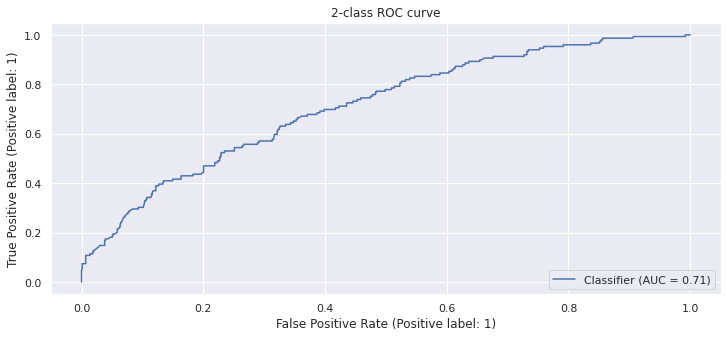

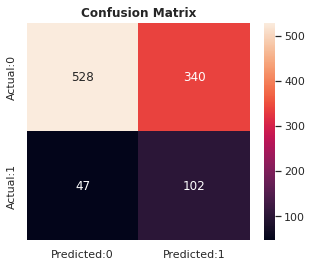

In [ ]:
results(rf_grid)

In [ ]:
rf_random=hyperparameter_tuning('RandomizedSearchCV',rf_model,params_rf)


Best parameters {'n_estimators': 500, 'min_samples_split': 0.1, 'min_samples_leaf': 0.2, 'max_depth': 3, 'criterion': 'entropy'}



The recall on train data:  0.6986573843858777
The recall on test data:  0.6644295302013423

The f1 score on train data:  0.683698296836983
The f1 score on test data:  0.3613138686131387


              precision    recall  f1-score   support

           0       0.92      0.65      0.76       868
           1       0.25      0.66      0.36       149

    accuracy                           0.66      1017
   macro avg       0.58      0.66      0.56      1017
weighted avg       0.82      0.66      0.71      1017



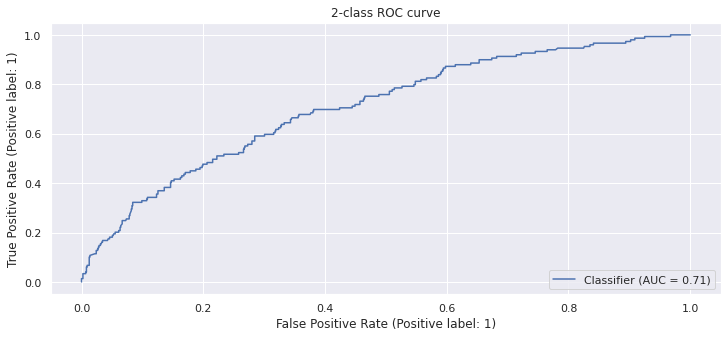

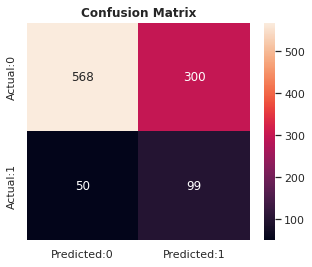

In [ ]:
results(rf_random)

In [ ]:
params_rf_bayes= { 'max_depth': Integer(1,20), 'min_samples_leaf': Real(0.1,0.5), 'min_samples_split':Real(0.1,0.5),
                  'criterion': ['gini', 'entropy'],
    'n_estimators':Integer(100,500) }
rf_bayes=hyperparameter_tuning('BayesSearchCV',rf_model,params_rf_bayes)


Best parameters OrderedDict([('criterion', 'entropy'), ('max_depth', 1), ('min_samples_leaf', 0.1), ('min_samples_split', 0.1), ('n_estimators', 100)])



The recall on train data:  0.7618100447538538
The recall on test data:  0.7046979865771812

The f1 score on train data:  0.7030748049564021
The f1 score on test data:  0.34426229508196726


              precision    recall  f1-score   support

           0       0.92      0.59      0.72       868
           1       0.23      0.70      0.34       149

    accuracy                           0.61      1017
   macro avg       0.57      0.65      0.53      1017
weighted avg       0.82      0.61      0.66      1017



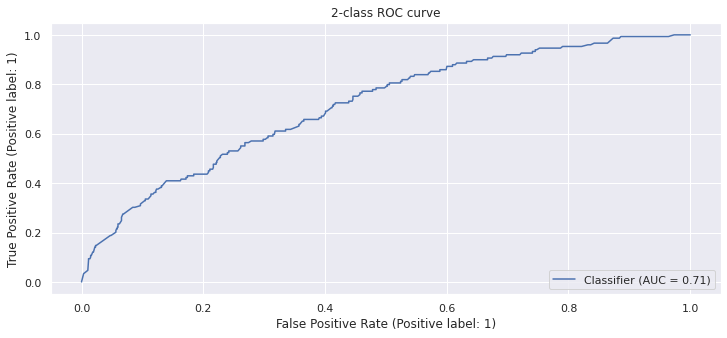

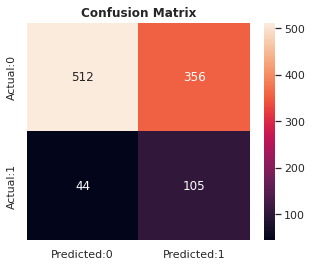

In [ ]:
results(rf_bayes)

#**SVM**

In [ ]:
# fir the support vector machine model
from sklearn.svm import SVC
svm_model=SVC(probability=True,random_state=42,class_weight='balanced')
svm_model.fit(X_train,y_train)

SVC(class_weight='balanced', probability=True, random_state=42)

In [ ]:
# obtain the train and test predictions and evaluate the results

train_pred_svc= svm_model.predict(X_train)
test_pred_svc= svm_model.predict(X_test)

evaluation_results(train_pred_svc, test_pred_svc)


The recall on train data:  0.7881650919940328
The recall on test data:  0.48322147651006714

The f1 score on train data:  0.7649613899613901
The f1 score on test data:  0.31304347826086953




In [ ]:
# define and describe the parameters to be tuned

params_svm= {'C':[0.1,0.01,0.001,1,5,10], 'gamma' : [0.001, 0.0001,0.00001], 'kernel': ['rbf','linear','poly']}

# C: default=1; should be decreased in case of lot of noisy observations it; decreasing C corresponds to more regularization.
# gamma: defines how much influence a single training example has; the larger gamma is, the closer other examples must be to be affected.
# kernal: kernel function 

Hyperparameter Tuning

In [ ]:
svm_grid=hyperparameter_tuning('GridSearchCV',svm_model,params_svm)


Best parameters {'C': 5, 'gamma': 0.001, 'kernel': 'rbf'}



The recall on train data:  0.729985082048732
The recall on test data:  0.6778523489932886

The f1 score on train data:  0.690173953925717
The f1 score on test data:  0.35626102292768963


              precision    recall  f1-score   support

           0       0.92      0.63      0.75       868
           1       0.24      0.68      0.36       149

    accuracy                           0.64      1017
   macro avg       0.58      0.66      0.55      1017
weighted avg       0.82      0.64      0.69      1017



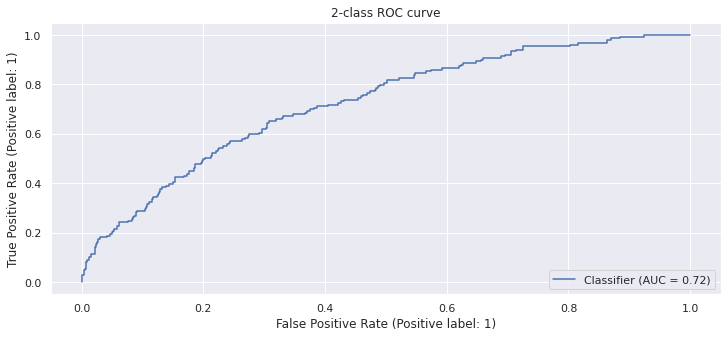

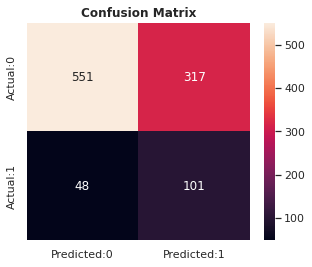

In [ ]:
results(svm_grid)

In [ ]:
svm_random=hyperparameter_tuning('RandomizedSearchCV',svm_model,params_svm)


Best parameters {'kernel': 'linear', 'gamma': 0.0001, 'C': 0.001}



The recall on train data:  0.7195425161611139
The recall on test data:  0.6711409395973155

The f1 score on train data:  0.6880646695197338
The f1 score on test data:  0.3552397868561279


              precision    recall  f1-score   support

           0       0.92      0.64      0.75       868
           1       0.24      0.67      0.36       149

    accuracy                           0.64      1017
   macro avg       0.58      0.65      0.55      1017
weighted avg       0.82      0.64      0.69      1017



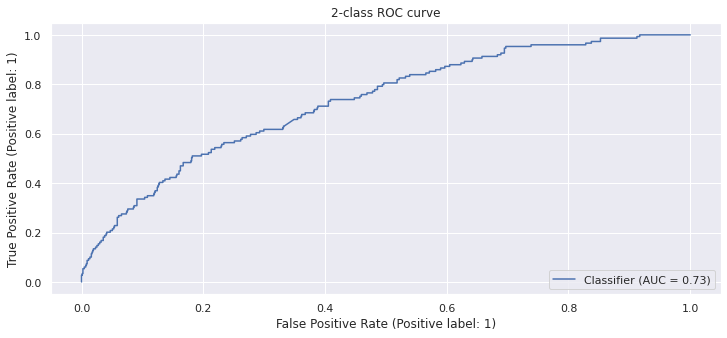

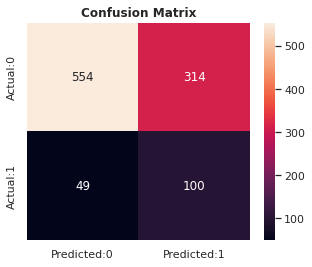

In [ ]:
results(svm_random)

In [ ]:
params_svm_bayes={'C': Real(1e-1, 1e+2, prior='log-uniform'),
                  'gamma': Real(1e-2, 1e+0, prior='log-uniform'), 
                  'kernel': Categorical(['linear', 'poly', 'rbf']) }
svm_bayes=hyperparameter_tuning('BayesSearchCV',svm_model,params_svm_bayes)


Best parameters OrderedDict([('C', 31.09257098524838), ('gamma', 0.2550922417779634), ('kernel', 'rbf')])



The recall on train data:  0.9860765788165092
The recall on test data:  0.22818791946308725

The f1 score on train data:  0.9706314243759178
The f1 score on test data:  0.19428571428571428


              precision    recall  f1-score   support

           0       0.86      0.81      0.83       868
           1       0.17      0.23      0.19       149

    accuracy                           0.72      1017
   macro avg       0.51      0.52      0.51      1017
weighted avg       0.76      0.72      0.74      1017



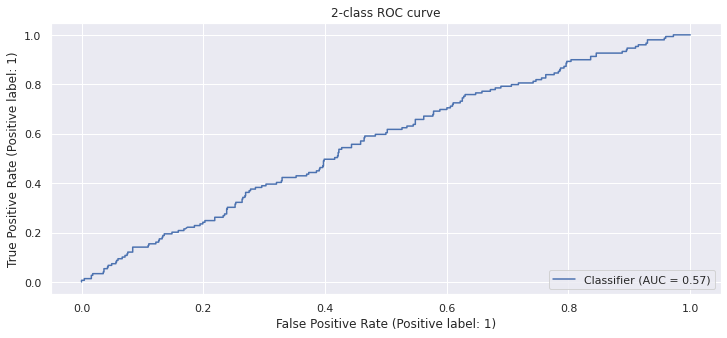

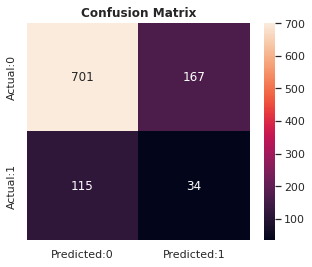

In [ ]:
results(svm_bayes)

# **K-Nearest Neighbour**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
# Choose the optimum k-value 
# Value of k for tuning, is taken taken upto sqrt(n); where n is no of records in the train dataset
# sqrt(4022) = 63.41

test_res = [] # store the recall scores for different values of k 
train_res = []
for k in range(1,63):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_train, y_train)
  knn_train_pred = knn_model.predict(X_train)
  knn_train_recall = recall_score(y_train,knn_train_pred)
  knn_test_pred = knn_model.predict(X_test)
  knn_test_recall = recall_score(y_test,knn_test_pred)

  test_res.append(knn_test_recall)
  train_res.append(knn_train_recall)


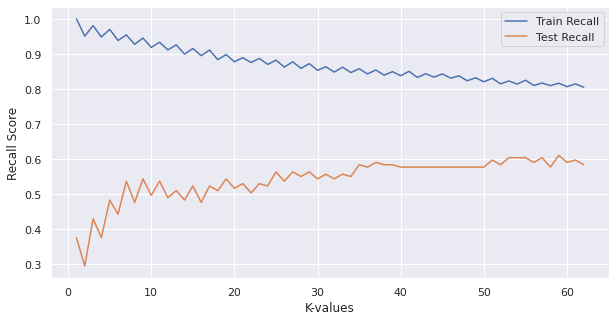

In [ ]:
# Plotting the train and test recall scores for different values of k
plt.figure(figsize=(10,5))
x_ = range(1,63)

plt.plot(x_, train_res, label='Train Recall')
plt.plot(x_, test_res, label = 'Test Recall')
plt.xlabel('K-values')
plt.ylabel('Recall Score')
plt.legend()
plt.show()

In [ ]:
# Obtain the k- value corresponding to the highest value of test- recall score
optimum_k = test_res.index(max(test_res))+1
optimum_k


59

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=optimum_k)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=59)

In [ ]:
# obtain the train and test predictions and evaluate results
knn_train_pred = knn_model.predict(X_train)
knn_test_pred= knn_model.predict(X_test)



The recall on train data:  0.8165091994032819
The recall on test data:  0.610738255033557

The f1 score on train data:  0.7350044762757385
The f1 score on test data:  0.30588235294117644


              precision    recall  f1-score   support

           0       0.90      0.59      0.71       868
           1       0.20      0.61      0.31       149

    accuracy                           0.59      1017
   macro avg       0.55      0.60      0.51      1017
weighted avg       0.80      0.59      0.65      1017



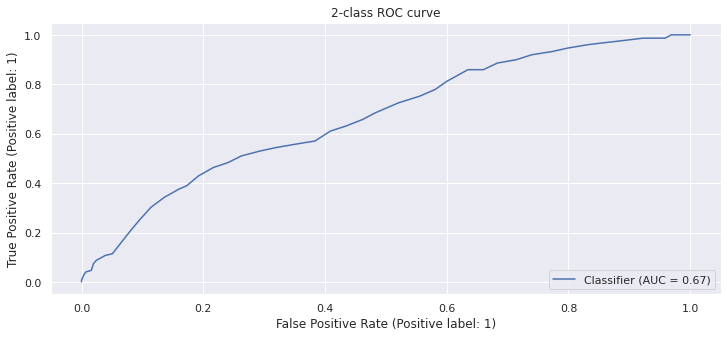

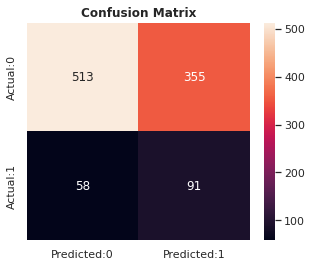

In [ ]:
results(knn_model)

**Summary**

In [ ]:
def evaluation_summary(model_name,tuner,tuned_model):
  
  #Calculate  Mean Squared Error      
  train_recall= recall_score(y_train,tuned_model.predict(X_train))
  test_recall= recall_score(y_test,tuned_model.predict(X_test))
  train_F1_score= f1_score(y_train,tuned_model.predict(X_train))
  test_F1_score= f1_score(y_test,tuned_model.predict(X_test))

  dictionary={'Model':model_name,
              'Hyperparameter_tuning': tuner,
             'Train-Recall':round(train_recall,4),
             'Test-Recall':round(test_recall,4),
             'Train-F1_score':round(train_F1_score,4),
             'Test-F1_score': round(test_F1_score,4)}

  # create training_result dataframe
  return pd.DataFrame(dictionary,index=[1])

In [ ]:
results_summary = pd.concat([evaluation_summary("Logistic Regression",'GridSearhCV',lr_grid),
                             evaluation_summary("Logistic Regression",'RandomSearchCV',lr_random),
                             evaluation_summary("Logistic Regression",'BayesSearchCV',lr_bayes),
                             evaluation_summary("Decision Tree",'GridSearhCV',dt_grid),
                             evaluation_summary("Decision Tree",'RandomSearchCV',dt_random),
                             evaluation_summary("Decision Tree",'BayesSearchCV',dt_bayes),
                             evaluation_summary("Random Forest",'GridSearhCV',rf_grid),
                             evaluation_summary("Random Forest",'RandomSearchCV',rf_random),
                             evaluation_summary("Random Forest",'BayesSearchCV',rf_bayes),
                             evaluation_summary("SVM",'GridSearhCV',svm_grid),
                             evaluation_summary("SVM",'RandomSearchCV',svm_random),
                             evaluation_summary("SVM",'BayesSearchCV',svm_bayes),
                             evaluation_summary("K-Nearest Neighbor",'Manual',knn_model)])



In [ ]:
results_summary

,Model,Hyperparameter_tuning,Train-Recall,Test-Recall,Train-F1_score,Test-F1_score
1,Logistic Regression,GridSearhCV,0.7016,0.6846,0.6860,0.3813
1,Logistic Regression,RandomSearchCV,0.6977,0.6644,0.6837,0.3694
1,Logistic Regression,BayesSearchCV,0.7041,0.6644,0.6870,0.3779
1,Decision Tree,GridSearhCV,0.8468,0.8322,0.7106,0.3320
1,Decision Tree,RandomSearchCV,0.7558,0.6913,0.6912,0.3194
1,Decision Tree,BayesSearchCV,0.8468,0.8322,0.7106,0.3320
1,Random Forest,GridSearhCV,0.7479,0.6846,0.6986,0.3452
1,Random Forest,RandomSearchCV,0.6987,0.6644,0.6837,0.3613
1,Random Forest,BayesSearchCV,0.7618,0.7047,0.7031,0.3443
1,SVM,GridSearhCV,0.7225,0.6779,0.6880,0.3614


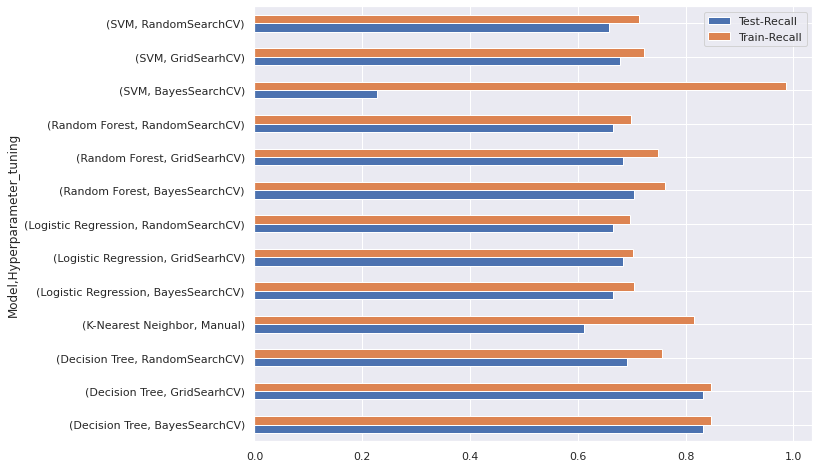

In [ ]:
import matplotlib.pyplot as mp
results_summary_ = results_summary.groupby(['Model', 'Hyperparameter_tuning'])['Test-Recall','Train-Recall'].min()
results_summary_.plot.barh(figsize=(10,8))

# results_summary_.plot(x='Model', y=['Test-Recall','Train-Recall'], kind="barh", figsize=(9, 8))
mp.show()

<BarContainer object of 13 artists>

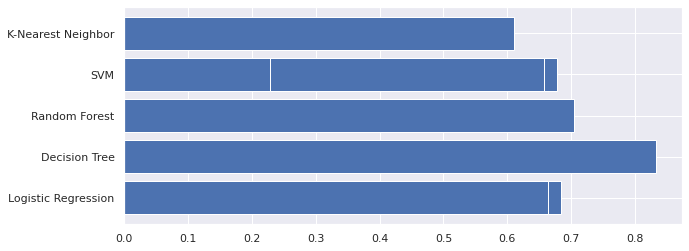

In [ ]:
fig=plt.figure(figsize=(10,4))
plt.barh(results_summary['Model'],results_summary['Test-Recall'])

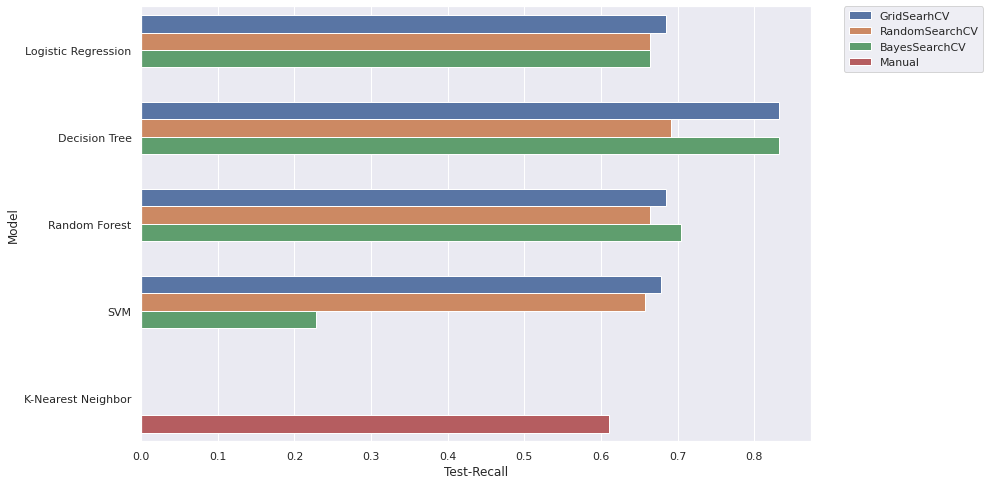

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(data=results_summary,x=results_summary['Test-Recall'],y=results_summary['Model'],hue=results_summary['Hyperparameter_tuning'], orient='h')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


## **Conclusion**

Considering the reliable data available, that indicates disease incidence rates/risk factors, exploratory and predictive analysis is done. 

Starting with the data pre-processing that includes missing values analysis, wherein the missing values in data are imputed with appropriate aggregate values. The outliers are left unhandled considering the possibility of them being the potential risk factors. The correlation between the dependent variable and the features is checked. Also, the dependency between the risk factors is exploited to handle the multicollinearity by imputing a new feature to replace the dependent ones.

The exploratory data analysis explains the type of classification and imbalance in class. It also shows the vulnerability of patients to disease based on the risk factors. The analysis helped in understanding the contribution of risk factors in predicting the risk.

Important features are identified and selected based on statistical methods that quantify the prospective relation between features and the target variable.
Feature importance study shows that age is one of the most important factors in predicting the risk of the disease.
Further oversampling is done in order to balance the data using one of the data augmentation techniques called SMOTE.
Skew transformation, encoding, and scaling are considered to prepare the data for modeling.  

Various classification algorithms like the following are experimented with to bring in the prediction along with various hyperparameter tuning techniques to fine-tune the parameters.

* Logistic Regression
* Decision Tree
* Random Forest
* Support Vector Machine
* K-Nearest Neighbors

Finally, and importantly, the utility of risk prediction algorithms is assessed in the context of the clinical environment, in order to do justice to the imbalance and the type of problem at hand.
Therefore considered to maximize the recall score while having a reasonable ability to distinguish between the classes as indicated by the ROC_AUC score.
 
**The conclusion is that the Random model can be considered the best among the ones that are experimented with. It predicts a pretty high recall score(0.7046) while having reasonable capacity to distinguish between the classes. (ROC_AUC= 0.71)**.
